In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df_no_net = pd.read_csv("10.3no_str.csv", header=1, index_col=0)

In [9]:
df_no_net

,DELAYAVG(ALL),SPEEDAVG(ALL),VEHACT(ALL),VEHARR(ALL)
TIMEINT,,,,
0-120,0.686588,51.684523,23.0,23
120-240,8.046266,43.517684,38.0,51
240-360,22.518325,32.339044,46.0,52
360-480,24.619742,29.412981,54.0,58
480-600,25.810539,28.918455,43.0,61
...,...,...,...,...
2520-2640,55.337902,14.306589,132.0,75
2640-2760,56.741509,14.264092,132.0,74
2760-2880,55.818859,14.359193,131.0,75


In [10]:
df_ourdec_net = pd.read_csv("10.3our_str.csv", header=1, index_col=0)

In [11]:
df_ourdec_net

,DELAYAVG(ALL),SPEEDAVG(ALL),VEHACT(ALL),VEHARR(ALL)
TIMEINT,,,,
0-120,1.487970,48.320311,25.0,21
120-240,5.858873,43.521693,37.0,54
240-360,24.556330,28.512820,50.0,47
360-480,24.445016,28.130937,56.0,60
480-600,18.899743,32.157512,36.0,70
...,...,...,...,...
2520-2640,22.890558,15.141697,111.0,64
2640-2760,24.322908,13.652674,110.0,59
2760-2880,24.467052,15.272234,109.0,68


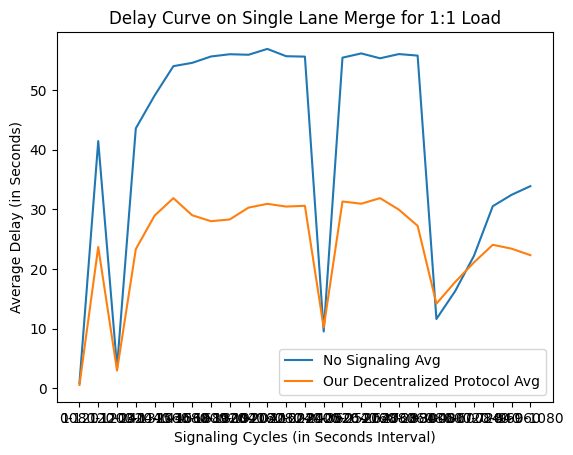

In [12]:
fig = plt.figure()
dl_no_net_Avg = df_no_net["DELAYAVG(ALL)"].groupby("TIMEINT").mean()
dl_ourdec_net_Avg = df_ourdec_net["DELAYAVG(ALL)"].groupby("TIMEINT").mean()
plt.plot(dl_no_net_Avg[:len(dl_no_net_Avg)-1], label="No Signaling Avg")
plt.plot(dl_ourdec_net_Avg[:len(dl_ourdec_net_Avg)-1], label="Our Decentralized Protocol Avg")
plt.legend()
plt.ylabel("Average Delay (in Seconds)")
plt.xlabel ("Signaling Cycles (in Seconds Interval)")
plt.title("Delay Curve on Single Lane Merge for 1:1 Load")
plt.show()
plt.close(fig)

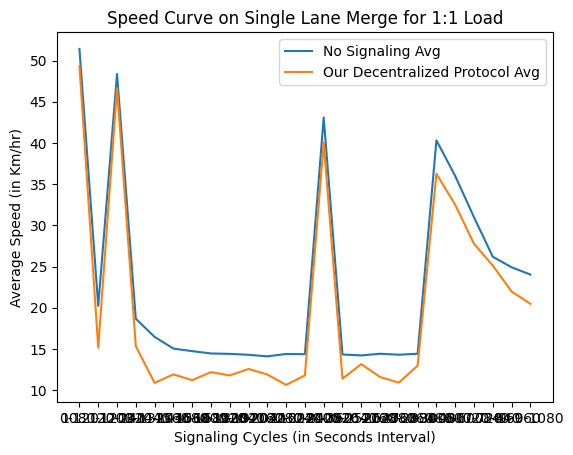

In [13]:
fig = plt.figure()
sp_no_net_Avg = df_no_net["SPEEDAVG(ALL)"].groupby("TIMEINT").mean()
sp_ourdec_net_Avg = df_ourdec_net["SPEEDAVG(ALL)"].groupby("TIMEINT").mean()
plt.plot(sp_no_net_Avg[:len(sp_no_net_Avg)-1], label="No Signaling Avg")
plt.plot(sp_ourdec_net_Avg[:len(sp_ourdec_net_Avg)-1], label="Our Decentralized Protocol Avg")
plt.legend()
plt.ylabel("Average Speed (in Km/hr)")
plt.xlabel ("Signaling Cycles (in Seconds Interval)")
plt.title("Speed Curve on Single Lane Merge for 1:1 Load")
plt.show()
plt.close(fig)

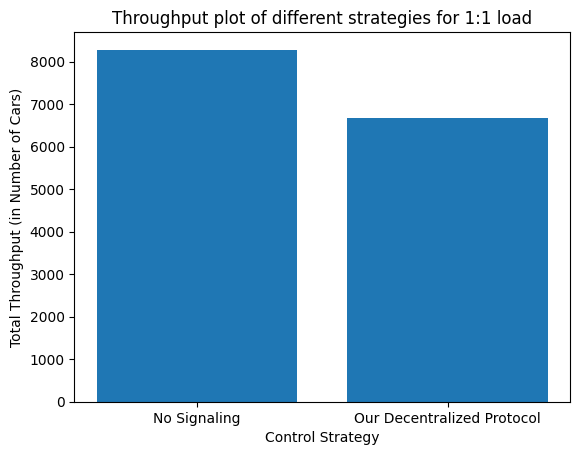

In [17]:
no_net_Arr = df_no_net["VEHARR(ALL)"].groupby("TIMEINT").sum()
ourdec_net_Arr = df_ourdec_net["VEHARR(ALL)"].groupby("TIMEINT").sum()
thpt = []
thpt.append(no_net_Arr[len(no_net_Arr)-1])
thpt.append(ourdec_net_Arr[len(ourdec_net_Arr)-1])
stgy = ["No Signaling","Our Decentralized Protocol"]

fig = plt.figure()
plt.bar(stgy, thpt)
plt.xlabel("Control Strategy")
plt.ylabel("Total Throughput (in Number of Cars)")
plt.title("Throughput plot of different strategies for 1:1 load")
plt.show()
plt.close(fig)